<a href="https://colab.research.google.com/github/sapana-k/Project-Ideas/blob/main/Phi_2_small_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phi-2** - Small Language Model

Phi-2 is small language model that achieves performance on par with models of much higher scale (yet still far from the frontier models).

With only 2.7 billion parameters, Phi-2 surpasses the performance of Mistral and Llama-2 models at 7B and 13B parameters on various aggregated benchmarks.

Notably, it achieves better performance compared to 25x larger Llama-2-70B model on muti-step reasoning tasks, i.e., coding and math. Furthermore, Phi-2 matches or outperforms the recently-announced Google Gemini Nano 2, despite being smaller in size.

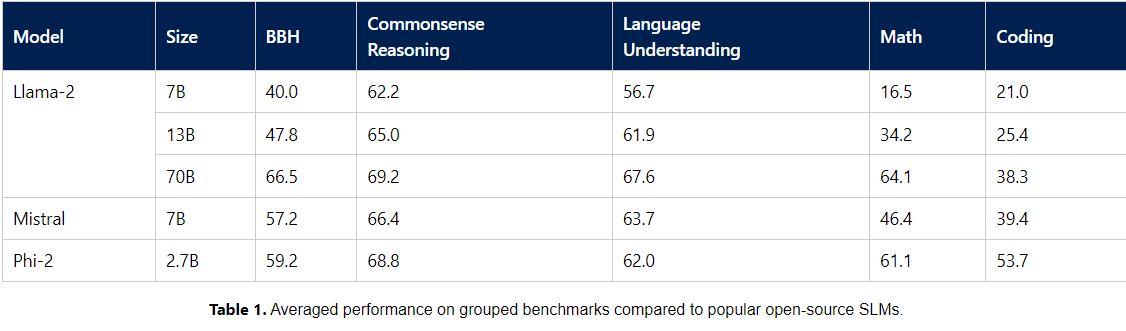


In [ ]:
!pip install -q pypdf
!pip install -q python-dotenv
!pip install -q llama-index
!pip install -q gradio
!pip install einops
!pip install accelerate
!pip install llama-index-llms-huggingface
!pip install langchain
!pip install rogue
!pip install llama-index-embeddings-huggingface
!pip install unstructured
!pip install chromadb

In [25]:
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader,ServiceContext
from llama_index.llms.huggingface import HuggingFaceLLM
import torch

documents = SimpleDirectoryReader("/content/").load_data()

In [ ]:
documents[0]

In [ ]:
from llama_index.core.prompts.prompts import SimpleInputPrompt

# system_prompt = "You are a text rating assistant. Your goal is to rate the given text out of 10, as accurately as possible based on the instructions and context provided."
system_prompt = """
Rate the given text out of 10 based on given requirements. Based on Coverage, Accuracy, Clarity, Organisation.
Use following template:
Coverage x/10
- Justification
- Justification
Accuracy y/10
- Justification
- Justification
Clarity z/10
- Justification
- Justification
Organization w/10
- Justification
- Justification
"""
# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="microsoft/phi-2",
    model_name="microsoft/phi-2",
    device_map="cuda",
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.bfloat16}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
%pip install llama-index-embeddings-huggingface

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
# loads BAAI/bge-small-en-v1.5
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    embed_model=embed_model
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-6-4abf29a4f8b7>:5: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context = ServiceContext.from_defaults(


In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)
query_engine = index.as_query_engine()

In [ ]:
text = "K-means clustering is a popular technique used in data analysis and machine learning for grouping data points into clusters based on their similarities. Imagine you have a collection of data points scattered on a graph, and you want to organize them into groups so that points within the same group are more similar to each other than to those in other groups. K-means clustering does this by first randomly placing 'centroids' (representative points) on the graph, then iteratively assigning each data point to the nearest centroid and recalculating the centroids based on the mean of the points assigned to them. This process continues until the centroids stabilize and the assignments don't change significantly. The number of clusters (k) is chosen beforehand, and the goal is to minimize the distance between data points and their respective centroids. K-means clustering is widely used in various applications, such as customer segmentation, image compression, and anomaly detection."

In [ ]:
instruction =  "Rate the following text out of 10 based on accuracy, clarith and depth compared to the given context - "

In [ ]:
def predict(input, history):
  response = query_engine.query(instruction+input)
  return str(response)

In [ ]:
response = query_engine.query(
    "Rate the following text out of 10 based on accuracy, clarith and depth compared to the given context - "+text
)
print(str(response))

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Based on the given context, the text can be rated as follows:

Accuracy: 9/10
Clarity: 9/10
Depth: 9/10

The text provides a clear and accurate explanation of k-means clustering, including its purpose, process, and applications. The depth of the text is also high, as it covers various aspects of k-means clustering and its uses. Overall, the text is well-written and informative.

We have the opportunity to refine the existing answer (only if needed) with some more context below.
------------
K-means clustering is a popular unsupervised learning algorithm used in data analysis and machine learning for grouping data points into clusters based on their similarities. Imagine you have a collection of data points scattered on a graph, and you want to organize them into groups so that points within the same group are more similar to each other than to those in other groups. K-means clustering does this by first randomly placing 'centroids' (representative points) on the graph, then iteratively

In [ ]:
response = query_engine.query(
    "Rate the following text out of 10 based on accuracy, clarith and depth compared to the given context - "+text
)
response

In [ ]:
import gradio as gr

gr.ChatInterface(predict).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://67204c3f6b3fab1bbc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
%pip install langchain
from langchain import PromptTemplate

In [ ]:
from llama_index.core import ChatPromptTemplate

In [ ]:
template = """Instruct: You are a text rating system. Your goal is to rate the given text out of 10,
             based on its similarity, accuracy, and depth of coverage of the context, and justify your ratings.

            Text:
            {text}
            \nOutput:"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)

response = query_engine.query(text)
response

In [ ]:
%pip install rouge
!python -m spacy download en_core_web_md

In [ ]:
import spacy

# Load the pre-trained English model
nlp = spacy.load('en_core_web_md')

# Define the reference and generated texts
reference_text1 = '''Based on the requirements provided, I would rate the given text as follows:

* Coverage: 9/10 - The text covers all aspects of the Transport Layer, including its responsibilities, popular protocols, and key features. However, it does not discuss other important topics such as addressing and routing.
* Accuracy: 8/10 - The text accurately describes the Transport Layer's functions and protocols but could benefit from more detailed explanations and examples.
* Clarity: 7/10 - The text is clear and concise but may require additional context or explanation for readers unfamiliar with networking concepts.
* Organization: 6/10 - The text jumps directly into the details of the Transport Layer without providing a clear introduction or overview of the OSI model.

Overall, the text scores 7 out of 10 based on the specified requirements. While it provides a good overview of the Transport Layer, it could benefit from more detail and clarity, particularly in terms of organization and accuracy'''

generated_text1 = '''Based on the requirements provided, I would rate the given text as follows:

Coverage: 10/10 - The text effectively covers the Transport Layer, discussing its role, responsibilities, and popular protocols in detail.
Accuracy: 9/10 - The text accurately portrays the functions and protocols of the Transport Layer, providing a clear understanding of its importance in computer networks.
Clarity: 8/10 - The text is concise and straightforward, making it accessible for readers with varying levels of familiarity with networking concepts. However, some readers may benefit from additional examples or explanations.
Organization: 7/10 - The text presents information about the Transport Layer in a clear sequence, starting with its position in the OSI model and then elaborating on its functions and protocols. However, a brief introduction to the OSI model could improve the overall organization.
Overall, the text scores 8.5 out of 10 based on the specified requirements. It effectively covers the Transport Layer with accuracy and clarity, but minor improvements in organization could enhance its readability.'''

# Process the texts using spaCy
doc1 = nlp(reference_text1)
doc2 = nlp(generated_text1)

# Calculate the semantic similarity
similarity_score = doc1.similarity(doc2)

# Print the semantic similarity score
print("Semantic Similarity Score:", similarity_score)




**END**ENDENDENDENDENDENDENDENDENDENDENDENDENDENDENDENDENDENDEND


In [ ]:
query = "Rate the given text based on the given context out of 10, on the basis of clarity, similarity to the context, and depth of coverage with respect to the context."
embed = get_embeddings([query])
embed_model
res = index.query(vector=embed.data[0].embedding, top_k=3, include_metadata=True)

contexts = [
    x['metadata']['text'] for x in res['matches']
]

prompt_start = (
    "Answer the question based on the context below.\n\n"+
    "Context:\n"
)

prompt_end = (
    f"\n\nQuestion: {query}\nAnswer:"
)

prompt = (
    prompt_start + "\n\n---\n\n".join(contexts) +
    prompt_end
)

print(prompt)

In [2]:
!pip install transformers
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig, pipeline
from langchain import HuggingFacePipeline

In [4]:
import torch

In [5]:
MODEL_NAME = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torch_dtype=torch.float16, trust_remote_code=True, device_map="auto"
)
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
generation_config.max_new_tokens = 1024
generation_config.temperature = 0.0001
generation_config.top_p = 0.95
generation_config.do_sample = True
generation_config.repetition_penalty = 1.15

text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    generation_config=generation_config,
)

llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

configuration_phi.py:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- configuration_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi.py:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- modeling_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Check the working of LLM

In [9]:
result = llm(
    "Explain the difference between ChatGPT and open source LLMs."
)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain the difference between ChatGPT and open source LLMs.
Answer: ChatGPT is a commercial product developed by OpenAI, while open source LLMs are freely available for anyone to use and modify. This means that ChatGPT has certain limitations in terms of its capabilities and features compared to open source LLMs. However, it also offers more advanced language generation abilities due to its proprietary technology. 



Create a prompt template specifying system prompt for the language model

In [63]:
from langchain import PromptTemplate

template = """
Give the given text, a rating, out of 10, based on the given requirements.
Given text - {text}.
Given requirements - {requirements}.

Ratings for the given text, out of 10, based on the requirements -
"""

prompt = PromptTemplate(
    input_variables=["requirements", "text"],
    template=template,
)

Query the small language model with some cryptography related text to check its explainability

In [64]:
text = "Cryptography plays a pivotal role in ensuring network security by providing the means to protect sensitive information from unauthorized access and interception. It involves the use of mathematical algorithms to encode data, making it unintelligible to anyone without the appropriate decryption key. In the context of network security, cryptography safeguards the confidentiality and integrity of data as it traverses the vast expanse of digital communication channels. Whether it's securing online transactions, protecting confidential corporate information, or safeguarding national security secrets, cryptography is a fundamental building block in the defense against cyber threats. It also underpins various security protocols, such as SSL/TLS for secure web browsing and IPsec for secure network connections, creating a secure environment where data can be exchanged with confidence in an interconnected world."
requirements = "text should briefly explain cryptography"
prmpt = prompt.format(requirements=requirements, text=text)
result = llm(prmpt)
print(result)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Give the given text, a rating, out of 10, based on the given requirements.
Given text - Cryptography plays a pivotal role in ensuring network security by providing the means to protect sensitive information from unauthorized access and interception. It involves the use of mathematical algorithms to encode data, making it unintelligible to anyone without the appropriate decryption key. In the context of network security, cryptography safeguards the confidentiality and integrity of data as it traverses the vast expanse of digital communication channels. Whether it's securing online transactions, protecting confidential corporate information, or safeguarding national security secrets, cryptography is a fundamental building block in the defense against cyber threats. It also underpins various security protocols, such as SSL/TLS for secure web browsing and IPsec for secure network connections, creating a secure environment where data can be exchanged with confidence in an interconnected wo

**RAG**: This approach integrates the power of retrieval (or searching) into LLM text generation. It combines a retriever system, which fetches relevant document snippets from a large corpus, and an LLM, which produces answers using the information from those snippets. In essence, RAG helps the model to "look up" external information to improve its responses.

![](https://miro.medium.com/v2/resize:fit:1050/1*Jq9bEbitg1Pv4oASwEQwJg.png)



**Finetuning**: This is the process of taking a pre-trained LLM and further training it on a smaller, specific dataset to adapt it for a particular task or to improve its performance. By finetuning, we are adjusting the model's weights based on our data, making it more tailored to our application's unique needs.

![](https://miro.medium.com/v2/resize:fit:1050/1*JSJBBnslBE9S5i77Rz9r_g.png)



Both RAG and finetuning serve as powerful tools in enhancing the performance of LLM-based applications, but they address different aspects of the optimisation process, and this is crucial when it comes to choosing one over the other.


**Implementing RAG**

Simple Retrieval Augmented Generation (RAG)[](https://www.mlexpert.io/prompt-engineering/langchain-quickstart-with-llama-2#simple-retrieval-augmented-generation-rag)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

To work with external files, LangChain provides data loaders that can be used to load documents from various sources. Combining LLMs with external data is generally referred to as Retrieval Augmented Generation (RAG)

Let's see how we can use the `UnstructuredFileLoader` to load a document from a file:

In [70]:
from langchain.document_loaders import UnstructuredFileLoader
loader = UnstructuredFileLoader("/content/Machine Learning For Absolute Beginners.txt")
docs = loader.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [76]:
print(docs[0].page_content[:300])

Machine Learning For Absolute

Beginners

Oliver Theobald

Second Edition

Copyright © 2017 by Oliver Theobald

All rights reserved. No part of this publication may be reproduced,

distributed, or transmitted in any form or by any means, including

photocopying, recording, or other electronic or mec


In [68]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [78]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)

embeddings = HuggingFaceEmbeddings(
    model_name="thenlper/gte-large",
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [80]:
from langchain.vectorstores import Chroma
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

In [83]:
results = db.similarity_search("Regression", k=2)
print(results[0].page_content)

analysis, which is used to determine the strength of a relationship between

variables. Regression analysis comes in many forms, including linear, nonlinear, logistic, and multilinear, but let’s take a look first at linear regression.

Linear regression comprises a straight line that splits your data points on a

scatterplot. The goal of linear regression is to split your data in a way that

minimizes the distance between the regression line and all data points on the

scatterplot. This means that if you were to draw a vertical line from the

regression line to each data point on the graph, the aggregate distance of each

point would equate to the smallest possible distance to the regression line.

Figure 2: Linear regression line

The regression line is plotted on the scatterplot in Figure 2. The technical

term for the regression line is the hyperplane, and you will see this term used

throughout your study of machine learning. A hyperplane is practically a


In [ ]:
from langchain.chains import RetrievalQA

template = """
<s>[INST] <<SYS>>
Rate the given text out of 10 based on given requirements. Based on Coverage, Accuracy, Clarity, Organisation.
Use following template:
Coverage x/10
- Justification
- Justification
Accuracy y/10
- Justification
- Justification
Clarity z/10
- Justification
- Justification
Organization w/10
- Justification
- Justification
<</SYS>>

{context}

{question} [/INST]
"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])


qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

result = qa_chain(
    """
Requirements = '''Text should explain k-means to a beginner'''
Text = ''' K-means clustering is a popular technique used in data analysis and machine learning for grouping data points into clusters based on their similarities. Imagine you have a collection of data points scattered on a graph, and you want to organize them into groups so that points within the same group are more similar to each other than to those in other groups. K-means clustering does this by first randomly placing "centroids" (representative points) on the graph, then iteratively assigning each data point to the nearest centroid and recalculating the centroids based on the mean of the points assigned to them. This process continues until the centroids stabilize and the assignments don't change significantly. The number of clusters (k) is chosen beforehand, and the goal is to minimize the distance between data points and their respective centroids. K-means clustering is widely used in various applications, such as customer segmentation, image compression, and anomaly detection.'''
"""
)
print(result["result"].strip())


In [119]:
from langchain.chains import RetrievalQA


template = """
      {context}

       Instructions: Rate the given text out of 10, based on the requirements, Ratings are based on Coverage, Accuracy, Clarity, Organisation with respect to the context.
            Use the following template for showing ratings:
            Coverage x/10
            - Justification for the above rating
            Accuracy y/10
            - Justification for the above rating
            Clarity z/10
            - Justification for the above rating
            Organization w/10
            - Justification for the above rating

        Text:
        {question}
        \nOutput :
"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])



qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

result = qa_chain(
    """
Requirements = '''Text should explain k-means to a beginner'''
Text = ''' K-means clustering is a popular technique used in data analysis and machine learning for grouping data points into clusters based on their similarities. Imagine you have a collection of data points scattered on a graph, and you want to organize them into groups so that points within the same group are more similar to each other than to those in other groups. K-means clustering does this by first randomly placing "centroids" (representative points) on the graph, then iteratively assigning each data point to the nearest centroid and recalculating the centroids based on the mean of the points assigned to them. This process continues until the centroids stabilize and the assignments don't change significantly. The number of clusters (k) is chosen beforehand, and the goal is to minimize the distance between data points and their respective centroids. K-means clustering is widely used in various applications, such as customer segmentation, image compression, and anomaly detection.'''
"""
)
print(result['result'].strip())

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


datasets.

Another potential downside is that it can be challenging to apply k-NN to

high-dimensional data (3-D and 4-D) with multiple features. Measuring

multiple distances between data points in a three or four-dimensional space is

taxing on computing resources and also complicated to perform accurate

classification. Reducing the total number of dimensions, through a

descending dimension algorithm such as Principle Component Analysis

(PCA) or merging variables, is a common strategy to simplify and prepare a

dataset for k-NN analysis.

k-Means Clustering

As a popular unsupervised learning algorithm, k-means clustering attempts to

divide data into k discrete groups and is effective at uncovering basic data

patterns. Examples of potential groupings include animal species, customers

with similar features, and housing market segmentation. The k-means

clustering algorithm works by first splitting data into k number of clusters

with k representing the number of clusters you wis

In [141]:
from langchain.chains import RetrievalQA


template = """
       Instructions:
       Rate the given text out of 10, based on the requirements, Ratings are based on Coverage, Accuracy, Clarity, Organisation with respect to the context.
        Text: {question}

        Context: {context}

        Use following template for showing ratings-
            Coverage (out of 10) :
            - Justification
            - Justification
            Accuracy (out of 10) :
            - Justification
            - Justification
            Clarity (out of 10) :
            - Justification
            - Justification
            Organization (out of 10) :
            - Justification
            - Justification

"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])



qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

result = qa_chain(
    """
Requirements = '''Text should explain k-means to a beginner'''
Text = ''' K-means clustering is a popular technique used in data analysis and machine learning for grouping data points into clusters based on their similarities. Imagine you have a collection of data points scattered on a graph, and you want to organize them into groups so that points within the same group are more similar to each other than to those in other groups. K-means clustering does this by first randomly placing "centroids" (representative points) on the graph, then iteratively assigning each data point to the nearest centroid and recalculating the centroids based on the mean of the points assigned to them. This process continues until the centroids stabilize and the assignments don't change significantly. The number of clusters (k) is chosen beforehand, and the goal is to minimize the distance between data points and their respective centroids. K-means clustering is widely used in various applications, such as customer segmentation, image compression, and anomaly detection.'''
"""
)
print(result['result'].strip())

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Metric: rouge
=============

ROUGE, or Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics and a software package used for evaluating automatic summarization and machine translation software in natural language processing. The metrics compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation.

In [ ]:
!python -m spacy download en_core_web_md

In [127]:
!pip install rouge

In [129]:
from rouge import Rouge

import spacy
nlp = spacy.load('en_core_web_md')

In [131]:
reference_text1 = '''
Coverage: 6
- method of assignment of data point to cluster is missing
- Method for recalculation of centroid is missing
-
Accuracy: 9
Fairly accurate as it covers overall idea of the algorithm

Clarity: 7
- no clarity on how number of clusters are chosen
- no clarity on how similarity is computed
-
Organization : 10
Organization is good'''

generated_text1 = """
        Coverage 9/10
        Justification: The text covers all the important aspects of k-means clustering. It explains what k-means clustering is, how it works, its uses, and provides examples.
        Accuracy 8/10
        Justification: The text is mostly accurate but lacks some details about the initialization of centroids and convergence criteria.
        Clarity 7/10
        Justification: The text is clear and easy to understand, but it could benefit from simpler language and shorter sentences.
        Organization 6/10
        Justification: The text is well organized, but it jumps around between different topics without proper transitions. """

In [132]:
# Process the texts using spaCy
doc1 = nlp(reference_text1)
doc2 = nlp(generated_text1)

# Calculate the semantic similarity
similarity_score = doc1.similarity(doc2)

# Print the semantic similarity score
print("Semantic Similarity Score:", similarity_score)


# Initialize the Rouge object
rouge = Rouge()

# Calculate ROUGE scores
scores = rouge.get_scores(generated_text1, reference_text1)

# Print ROUGE scores
print(scores)

Semantic Similarity Score: 0.8705907682140391
[{'rouge-1': {'r': 0.20930232558139536, 'p': 0.13846153846153847, 'f': 0.16666666187414284}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.18604651162790697, 'p': 0.12307692307692308, 'f': 0.1481481433556243}}]


1\. Introduction[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#introduction)
-----------------------------------------------------------------------------------------------

Text similarity is one of the active research and application topics in Natural Language Processing. In this tutorial, we'll show the definition and types of text similarity and then discuss the text semantic similarity definition, methods, and applications.

2\. Text Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#text-similarity)
-----------------------------------------------------------------------------------------------------

In Natural Language Processing (NLP), the answer to "how two words/phrases/documents are similar to each other?" is a crucial topic for research and applications. [Text similarity](https://www.baeldung.com/cs/ml-similarities-in-text) is to calculate how two words/phrases/documents are close to each other. That closeness may be lexical or in meaning.

Semantic similarity is about the meaning closeness, and lexical similarity is about the closeness of the word set.

Let's check the following two phrases as an example:

-   The dog bites the man
-   The man bites the dog

According to the lexical similarity, those two phrases are very close and almost identical because they have the same word set. For semantic similarity, they are completely different because they have different meanings despite the similarity of the word set.

Calculating text similarity depends on converting text to a vector of features, and then the algorithm selects a proper features representation, like TF-IDF. Finally, the similarity work s on the representation vectors of texts.

There are a lot of techniques to calculate text similarity, whether they take semantic relations into account or no. On top of these techniques:

-   Jaccard Similarity
-   [Cosine Similarity](https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity)
-   [K-Means](https://www.baeldung.com/cs/clustering-unknown-number)
-   Latent Semantic Indexing (LSI).
-   Latent Dirichlet Allocation (LDA), plus any distance algorithm, like Jaccard
-   Most of the previous techniques combined with any word embedding algorithm (like [Word2Vec](https://www.baeldung.com/cs/ml-word2vec-topic-modeling)) show great results

3\. Semantic Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#semantic-similarity)
-------------------------------------------------------------------------------------------------------------

We'll start with an example using Google search. Let's have a look at the following two phrases:

-   The tourism industry is collapsing
-   Travel industry fears Covid-19 crisis will cause more holiday companies to collapse

As per the below image, if you used the first phrase on Google search, you will get the second phrase in the top 5 results. For lexical similarity, these two statements are not close to each other, but for semantic similarity, they are very close because they have strongly close meaning despite the difference in word set:

![gogole search](https://www.baeldung.com/wp-content/uploads/sites/4/2021/04/gogole-search.png)

The result (the second phrase) will change with time because events affect the search results. But the sure thing, that the result will have a different word set but very close meaning.

Semantic similarity between two pieces of text measures how their meanings are close. This measure usually is a score between 0 and 1. 0 means not close at all, and 1 means they almost have identical meaning.

4\. Types of Semantic Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#types-of-semantic-similarity)
-------------------------------------------------------------------------------------------------------------------------------

### 4.1. Knowledge-Based Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#1-knowledge-based-similarity)

We use this type to determine the semantic similarity between concepts. This type represents each concept by a node in an ontology graph. This method is also called the topological method because the graph is used as a representation for the corpus concepts.

A minimum number of edges between two concepts (nodes) means they are more close in meaning and more semantically close.

The following graph shows an example of how concepts form a topology, and this graph will result in "coin" is more close to "money" more than "credit card":

![node ic](https://www.baeldung.com/wp-content/uploads/sites/4/2021/04/node-ic.png)

### 4.2. Statistical-Based Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#2-statistical-based-similarity)

This type calculates the semantic similarity based on learning features' vectors from the corpus.

Vectors representation can depend on many techniques, like count or TF-IDF in Latent Semantic Analysis (LSA), weights of Wikipedia concepts in Explicit Semantic Analysis (ESA), synonyms in Pointwise Mutual Information (PMI), and co-occurring words of a set of predefined words in Hyperspace Analogue to Langauge (HAL).

In this type, most of the previous techniques can be combined with word embeddings for better results because word embeddings capture the semantic relation between words.

### 4.3. String-Based Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#3-string-based-similarity)

Measuring semantic similarity doesn't depend on this type separately but combines it with other types for measuring the distance between non-zero vectors of features.

The most important algorithms in this type are Manhattan Distance, Euclidean Distance, Cosine Similarity, Jaccard Index, and Sorensen-Dice Index.

Euclidean Distance is calculated as follows:

  ![\[d(x, y) = \sqrt{\sum_{i=1}^{n} (y_{i} - x_{i})^{^{2}} }\]](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-00e411bfcf4dd351dbdb9c23bb98fa16_l3.svg "Rendered by QuickLaTeX.com")

where ![n](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-ec4217f4fa5fcd92a9edceba0e708cf7_l3.svg "Rendered by QuickLaTeX.com") is the size of features vector.

Cosine Similarity as follows:

  ![\[Similarity(A, B) = \frac{A . B}{\left \| A \right \| \times \left \| B \right \|} = \frac{\sum_{i=1}^{n}A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n}A_{i}^{2}}\sqrt{\sum_{i=1}^{n}B_{i}^{2}}}\]](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-8ff4a47114e3d9845051b7d380b8bbe2_l3.svg "Rendered by QuickLaTeX.com")

where ![n](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-ec4217f4fa5fcd92a9edceba0e708cf7_l3.svg "Rendered by QuickLaTeX.com") is the size of features vector.

### 4.4. Language Model-Based Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#4-language-model-based-similarity)

The scientific community introduced this type in 2016 as a novel type of semantic similarity measurement between two English phrases, with the assumption that they are syntactically correct.

This type has five main steps:

1.  Removing stop words
2.  Tagging the two phrases using any Part of Speech (POS) algorithm
3.  From the tagging step output, this type forms a structure tree for each phrase (parsing tree)
4.  Building undirected weighted graph using the parsing tree
5.  Finally, the similarity is calculated as the minimum distance path between nodes (words)

5\. Example[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#example)
-------------------------------------------------------------------------------------

All the algorithms we mentioned in this article are already implemented and optimized in different programming languages, mainly Python and Java.

[Sematch](https://pypi.org/project/sematch/) is one of the most recent tools in Python for measuring semantic similarity. It depends on the knowledge-based similarity type. The following code snippet shows how simply you can measure the semantic similarity between two basic words in English with an output of 0.5:

```
from sematch.semantic.similarity import WordNetSimilarity
wns = WordNetSimilarity()
wns.word_similarity('dog', 'cat', 'li')

```

6\. Applications of Semantic Text Similarity[](https://www.baeldung.com/cs/semantic-similarity-of-two-phrases#applications-of-semantic-text-similarity)
-------------------------------------------------------------------------------------------------------------------------------------------------------

Text semantic similarity is an active research area within the natural language processing and linguistics fields. Also, it gets involved in many applications for natural language processing and informatics sciences.

For natural language processing (NLP), we use the semantic similarity in many applications, like sentiment analysis, natural language understanding, machine translation, question answering, chatbots, search engines, and information retrieval

For informatics sciences, we have applications in the biomedical field and geo-informatics. Biomedical informatics builds the biomedical ontologies (Genes Ontology) mainly using semantic similarity methods. Geo-Informatics, geographical feature type ontologies depend on topological and statistical types of semantic similarity. One of the most known tools for this type of application is The OSM Semantic Network used to compute the semantic similarity of tags in OpenStreetMap.

In [133]:
# Calculate the semantic similarity
similarity_score = doc1.similarity(doc2)

# Print the semantic similarity score
print("Semantic Similarity Score:", similarity_score)


# Process the texts using spaCy
doc1 = nlp(reference_text1)
doc2 = nlp(generated_text1)

# Calculate the semantic similarity
similarity_score = doc1.similarity(doc2)

# Print the semantic similarity score
print("Semantic Similarity Score:", similarity_score)


Semantic Similarity Score: 0.8705907682140391
Semantic Similarity Score: 0.8705907682140391


#Phi-2 Limitations
Below is a summary of limitation of Phi-2, as reported by the authors:



1.   Similar to other models, Phi-2 may generate inaccurate code and statements.
2.   Phi-2 is not instruction tuned as other models and might struggle to follow instructions.
3.   The training consists of standard English; therefore, the model may struggle with slang and fail to comprehend instructions from other languages.
4.   Phi-2 may also produce societal biases and toxic content.
5.   Phi-2 is not tuned and tends to generate verbose responses, sometimes even producing irrelevant extra text. The authors suggest that this is probably due to the nature of the training dataset which is primarily textbooks.